In [69]:
from sorix import tensor
from utils import draw_forward, draw_backward

# Tensor

In [70]:
x = tensor([1, 2, 3])
x

Tensor(
[1 2 3], shape=(3,), device=cpu, requires_grad=False)

In [71]:
print(x.data)
print(x.grad)
print(x._prev)

[1 2 3]
None
[]


In [72]:
x = tensor([1, 2, 3], requires_grad=True)

print(x.data)
print(x.grad)
print(x._prev)

[1 2 3]
[0 0 0]
[]


In [73]:
a = tensor([1, 2, 3])
b = tensor([4, 5, 6])

c = a + b

print(c.data)
print(c.grad)
print(c._prev)

[5 7 9]
None
[]


# Foward

In [74]:
a = tensor([1, 2, 3], requires_grad=True)
b = tensor([4, 5, 6], requires_grad=True)

c = a + b

print(c._op)
print(c.data)
print(c.grad)
print(c._prev)

+
[5 7 9]
[0 0 0]
[Tensor(
[1 2 3], shape=(3,), device=cpu, requires_grad=True), Tensor(
[4 5 6], shape=(3,), device=cpu, requires_grad=True)]


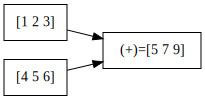

In [75]:
draw_forward(c)

In [76]:
a = tensor([1, 2, 3], requires_grad=True)
b = tensor([4, 5, 6], requires_grad=True)

c = a + b**2

print(c.data)
print(c.grad)
print(c._prev)

[17 27 39]
[0 0 0]
[Tensor(
[1 2 3], shape=(3,), device=cpu, requires_grad=True), Tensor(
[16 25 36], shape=(3,), device=cpu, requires_grad=True)]


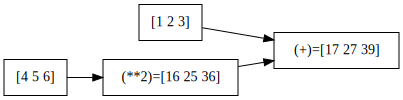

In [77]:
draw_forward(c)

# Backward

In [78]:
c.backward()

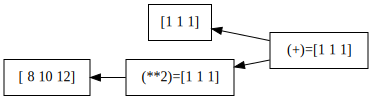

In [79]:
dot = draw_backward(c)
dot

# Control del Grafo

In [80]:
import sorix

with sorix.no_grad():
    a = tensor([1, 2, 3], requires_grad=True)
    b = tensor([4, 5, 6], requires_grad=True)

    c = a + b**2

    print(c.data)
    print(c.grad)
    print(c._prev)

[17 27 39]
None
[]


# GPU

In [81]:
import sorix
device = 'gpu' if sorix.cuda.is_available() else 'cpu'
device

✅ GPU basic operation passed
✅ GPU available: NVIDIA GeForce RTX 4070 Laptop GPU
CUDA runtime version: 13000
CuPy version: 13.6.0


'gpu'

In [83]:
x = tensor([1, 2, 3], requires_grad=True,device=device)
x

Tensor(
[1 2 3], shape=(3,), device=gpu, requires_grad=True)